<a href="https://colab.research.google.com/github/HuseyinAts/Acikhack2023_TrendMiner/blob/main/soft_cluster_assignment_auto_encoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 52.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 105.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.8/199.8 KB 22.2 MB/s eta 0:00:00


In [ ]:
!pip install zeyrek

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 931.0/931.0 KB 14.8 MB/s eta 0:00:00


In [ ]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from google.colab import drive
from oauth2client.client import GoogleCredentials

import string
import re
import sys
import glob

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import nltk
import zeyrek
from nltk.tokenize import word_tokenize as wt
from nltk.corpus import stopwords as sw
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster import KMeans
from sklearn.cluster import Birch
from sklearn.cluster import SpectralClustering

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import torch
import transformers as ppb
import warnings
warnings.filterwarnings('ignore')


import tensorflow as tf
import torch
import time
import datetime
import random
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from google.colab import drive

import transformers
from transformers import BertTokenizer
from torch.utils.data import TensorDataset, random_split
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler
from transformers import BertForSequenceClassification, AdamW, BertConfig
from transformers import get_linear_schedule_with_warmup

from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder

import torch
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler
from transformers import BertTokenizer, BertForSequenceClassification
from sklearn.model_selection import train_test_split

import pandas as pd
import numpy as np

from tabulate import tabulate
from tqdm import trange
import random

import json
import re
import numpy as np
import torch as th

In [ ]:
# install fast_ml library
! pip install fast_ml --quiet
# imports
import pandas as pd
from fast_ml.model_development import train_valid_test_split

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.1/42.1 KB 2.2 MB/s eta 0:00:00


In [ ]:
### Install Hugging Face Hub
!python -m pip install huggingface_hub
!python -m pip install evaluate

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.4/81.4 KB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.2/212.2 KB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 KB 14.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.7/468.7 KB 23.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.9/132.9 KB 16.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 53.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.8/158.8 KB 21.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 264.6/264.6 KB 30.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.2/114.2 KB 14.9 MB/s eta 0:00:00


In [ ]:
from huggingface_hub import notebook_login

notebook_login()

In [ ]:
df = pd.read_excel('/content/final.xlsx')

In [ ]:
df['encoded_categories'] = LabelEncoder().fit_transform(df['target'])

print(df.sample(20))
print(df.groupby('target').size())

                                                    text  is_offensive  \
11001  Kadın kısmısı gece geç saatlere kadar dışarda ...           1.0   
7658                         eski gemlik yolu leylak sok           0.0   
1618                      oturum başkanı buyurun efendim           0.0   
4971                                biz de yanına gittik           0.0   
6218                         oğlu olmak bir ayrıcalıktır           1.0   
10895  senin edebiyat hocana ekmek veren fırıncının k...           1.0   
9824        gavur değil mi vatandaşlığını alıp boşayacak           1.0   
956    giriş ve çıkış formları doldurulup imzalanmalıdır           0.0   
2311                       benim için yetersiz bakiyesin           1.0   
1551                                kadından ortak olmaz           1.0   
2230        Avrat gibi düşman olmaz yüzü güler bildirmez           1.0   
5310           saygısız ve kendini bilmez biri olmuşssun           1.0   
4251                   Çok pissin Arap

In [ ]:
df

,text,is_offensive,target,encoded_categories
0,çürük dişli,1.0,INSULT,0
1,Bu adamın islama ve müslümanlara verdiği zarar...,1.0,RACIST,3
2,erkekler zora gelmez,1.0,SEXIST,4
3,Utanmazın götüne kazık sokmuşlar bu tıkırtı ne...,1.0,PROFANITY,2
4,otomasyon< sistemlerine= doğrudan bağlanabilir,0.0,OTHER,1
...,...,...,...,...
12465,uyuma taklidi yapan tehlikeli bir hayvanın göz...,0.0,OTHER,1
12466,yolda at kavga eden üç oğlan çocuğu görür,0.0,OTHER,1
12467,sizin köpeklerinizin burnu bile daha iyi koku ...,0.0,OTHER,1
12468,hayalleri gerçek etmek için birisinin delilik ...,0.0,OTHER,1


In [ ]:
df=df.drop(['is_offensive'], axis=1)

In [ ]:
df

,text,target,encoded_categories
0,çürük dişli,INSULT,0
1,Bu adamın islama ve müslümanlara verdiği zarar...,RACIST,3
2,erkekler zora gelmez,SEXIST,4
3,Utanmazın götüne kazık sokmuşlar bu tıkırtı ne...,PROFANITY,2
4,otomasyon< sistemlerine= doğrudan bağlanabilir,OTHER,1
...,...,...,...
12465,uyuma taklidi yapan tehlikeli bir hayvanın göz...,OTHER,1
12466,yolda at kavga eden üç oğlan çocuğu görür,OTHER,1
12467,sizin köpeklerinizin burnu bile daha iyi koku ...,OTHER,1
12468,hayalleri gerçek etmek için birisinin delilik ...,OTHER,1


In [ ]:
df.columns = ['content', 'category', 'encoded_categories']

In [ ]:
df

,content,category,encoded_categories
0,çürük dişli,INSULT,0
1,Bu adamın islama ve müslümanlara verdiği zarar...,RACIST,3
2,erkekler zora gelmez,SEXIST,4
3,Utanmazın götüne kazık sokmuşlar bu tıkırtı ne...,PROFANITY,2
4,otomasyon< sistemlerine= doğrudan bağlanabilir,OTHER,1
...,...,...,...
12465,uyuma taklidi yapan tehlikeli bir hayvanın göz...,OTHER,1
12466,yolda at kavga eden üç oğlan çocuğu görür,OTHER,1
12467,sizin köpeklerinizin burnu bile daha iyi koku ...,OTHER,1
12468,hayalleri gerçek etmek için birisinin delilik ...,OTHER,1


In [ ]:
from datasets import Dataset
dataset = Dataset.from_pandas(df)
dataset = dataset.class_encode_column("category")
df

Casting to class labels:   0%|          | 0/12470 [00:00<?, ? examples/s]

,content,category,encoded_categories
0,çürük dişli,INSULT,0
1,Bu adamın islama ve müslümanlara verdiği zarar...,RACIST,3
2,erkekler zora gelmez,SEXIST,4
3,Utanmazın götüne kazık sokmuşlar bu tıkırtı ne...,PROFANITY,2
4,otomasyon< sistemlerine= doğrudan bağlanabilir,OTHER,1
...,...,...,...
12465,uyuma taklidi yapan tehlikeli bir hayvanın göz...,OTHER,1
12466,yolda at kavga eden üç oğlan çocuğu görür,OTHER,1
12467,sizin köpeklerinizin burnu bile daha iyi koku ...,OTHER,1
12468,hayalleri gerçek etmek için birisinin delilik ...,OTHER,1


In [ ]:
df['encoded_categories'] = LabelEncoder().fit_transform(df['category'])

print(df.sample(10))
print(df.groupby('category').size())

                                                 content   category  \
7939                           Kadınlar parayı çok sever     SEXIST   
2688          dünün bebesi bu gün gelmiş akıl mı veriyor     INSULT   
7561         Kadın yüzünden gülen ömründe bir kere güler     SEXIST   
4129                                        büyük toynak     INSULT   
8172     geçen gün götten vermiş onu anlatıyor bna denyo  PROFANITY   
6389                                  amın sikime girsin  PROFANITY   
8487                     anca bayat sözler sarfediyorsun     INSULT   
7692                                bir dayak daha yedik      OTHER   
10434         karımın benden fazla kazanmasına dayanamam     SEXIST   
7075   çekim sırasında hissedilen kaos ve sinir savaş...      OTHER   

       encoded_categories  
7939                    4  
2688                    0  
7561                    4  
4129                    0  
8172                    2  
6389                    2  
8487                  

In [ ]:
from fast_ml.model_development import train_valid_test_split

X_train, y_train, X_valid, y_valid, X_test, y_test = train_valid_test_split(df, target = 'category', 
                                                                            train_size=0.8, valid_size=0.1, test_size=0.1)

print(X_train.shape), print(y_train.shape)
print(X_valid.shape), print(y_valid.shape)
print(X_test.shape), print(y_test.shape)

(9976, 2)
(9976,)
(1247, 2)
(1247,)
(1247, 2)
(1247,)


(None, None)

In [ ]:
training_texts = X_train['content']

In [ ]:
training_labels = y_train

In [ ]:
training = df.groupby('category').apply(lambda x : x.sample(frac = 0.8))
test = pd.concat([df,training]).drop_duplicates(keep=False)

print("Training: ", len(training))
print("Test: ", len(test))

training_contents = training.content.values
training_labels = training.encoded_categories.values

Training:  9971
Test:  2496


In [ ]:
training_contents = training.content.values
training_labels = training.encoded_categories.values

In [ ]:
tokenizer = BertTokenizer.from_pretrained('dbmdz/bert-base-turkish-128k-uncased', do_lower_case=True,truncation=True)
sentences = df.content.values
max_len = 100

In [ ]:
input_ids = []
attention_masks = []

for content in training_contents:
    encoded_dict = tokenizer.encode_plus(
                        content,
                        truncation=True,                     
                        add_special_tokens = True,
                        max_length = max_len,      
                        pad_to_max_length = True,
                        return_attention_mask = True, 
                        return_tensors = 'pt',
                   )
    
    input_ids.append(encoded_dict['input_ids'])
    attention_masks.append(encoded_dict['attention_mask'])

input_ids = torch.cat(input_ids, dim=0)
attention_masks = torch.cat(attention_masks, dim=0)
labels = torch.tensor(training_labels)

print('Original: ', training_contents[15])
print('Token IDs:', input_ids[15])

Original:  Bilmediğin işlere burnunu sokma
Token IDs: tensor([    2, 64237,  3122, 72798,  1011, 31593, 38490,     3,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0])


In [ ]:
train_dataset = TensorDataset(input_ids, attention_masks, labels)

batch_size = 32

train_dataloader = DataLoader(
            train_dataset,  
            sampler = RandomSampler(train_dataset), 
            batch_size = batch_size 
        )

number_of_categories = len(df['encoded_categories'].unique())

model = BertForSequenceClassification.from_pretrained(
    "dbmdz/bert-base-turkish-128k-uncased",
    num_labels = number_of_categories, 
    output_attentions = False,
    output_hidden_states = False,
)
 
model.cuda()

Some weights of the model checkpoint at dbmdz/bert-base-turkish-128k-uncased were not used when initializing BertForSequenceClassification: ['cls.seq_relationship.weight', 'cls.predictions.decoder.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.bias', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassificatio

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(128000, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0): BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, elemen

In [ ]:
epochs = 4

optimizer = AdamW(model.parameters(),
                  lr = 5e-5,
                  eps = 1e-8 
                )

total_steps = len(train_dataloader) * epochs
scheduler = get_linear_schedule_with_warmup(optimizer, 
                                            num_warmup_steps = 0,
                                            num_training_steps = total_steps)

In [ ]:
# check GPU
device_name = tf.test.gpu_device_name()
if device_name == '/device:GPU:0':
    device = torch.device("cuda")
    print('GPU:', torch.cuda.get_device_name(0))
else:
    raise SystemError('GPU device not found')

GPU: NVIDIA A100-SXM4-40GB


In [ ]:
def format_time(elapsed):
    elapsed_rounded = int(round((elapsed)))
    return str(datetime.timedelta(seconds=elapsed_rounded))

# This training code is based on the `run_glue.py` script here:
# https://github.com/huggingface/transformers/blob/5bfcd0485ece086ebcbed2d008813037968a9e58/examples/run_glue.py#L128

seed_val = 1903

random.seed(seed_val)
np.random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)

training_stats = []
total_t0 = time.time()

for epoch_i in range(0, epochs):
    print('======== Epoch {:} / {:} ========'.format(epoch_i + 1, epochs))
    t0 = time.time()
    total_train_loss = 0
    model.train()

    for step, batch in enumerate(train_dataloader):
        if step % 10 == 0 and not step == 0:
            elapsed = format_time(time.time() - t0)
            print('Batch {:>5,}  of  {:>5,}.    Elapsed: {:}.'.format(step, len(train_dataloader), elapsed))

        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_labels = batch[2].to(device)

        model.zero_grad()        
        output = model(b_input_ids, 
                       token_type_ids=None, 
                       attention_mask=b_input_mask, 
                       labels=b_labels)
        loss = output['loss']
        logits = output['logits']
        total_train_loss += loss.item()
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)
        optimizer.step()
        scheduler.step()

    avg_train_loss = total_train_loss / len(train_dataloader)            
    training_time = format_time(time.time() - t0)

    print("Average training loss: {0:.2f}".format(avg_train_loss))
    print("Training epoch took: {:}".format(training_time))

    training_stats.append(
        {
            'epoch': epoch_i + 1,
            'Training Loss': avg_train_loss,
            'Training Time': training_time,
        }
    )

print("Training completed in {:} (h:mm:ss)".format(format_time(time.time()-total_t0)))

======== Epoch 1 / 4 ========
Batch    10  of    312.    Elapsed: 0:00:04.
Batch    20  of    312.    Elapsed: 0:00:05.
Batch    30  of    312.    Elapsed: 0:00:07.
Batch    40  of    312.    Elapsed: 0:00:08.
Batch    50  of    312.    Elapsed: 0:00:10.
Batch    60  of    312.    Elapsed: 0:00:11.
Batch    70  of    312.    Elapsed: 0:00:12.
Batch    80  of    312.    Elapsed: 0:00:14.
Batch    90  of    312.    Elapsed: 0:00:15.
Batch   100  of    312.    Elapsed: 0:00:17.
Batch   110  of    312.    Elapsed: 0:00:18.
Batch   120  of    312.    Elapsed: 0:00:19.
Batch   130  of    312.    Elapsed: 0:00:21.
Batch   140  of    312.    Elapsed: 0:00:22.
Batch   150  of    312.    Elapsed: 0:00:24.
Batch   160  of    312.    Elapsed: 0:00:25.
Batch   170  of    312.    Elapsed: 0:00:27.
Batch   180  of    312.    Elapsed: 0:00:28.
Batch   190  of    312.    Elapsed: 0:00:29.
Batch   200  of    312.    Elapsed: 0:00:31.
Batch   210  of    312.    Elapsed: 0:00:32.
Batch   220  of    312.  

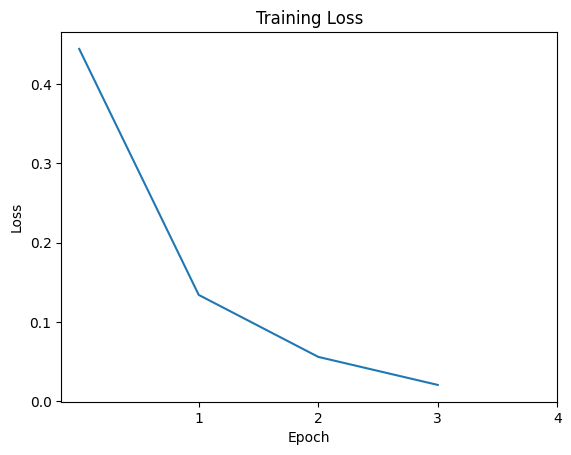

In [ ]:
df_stats = pd.DataFrame(data=training_stats)
plt.plot(df_stats['Training Loss'], label="Training")
plt.title("Training Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.xticks([1, 2, 3, 4])
plt.show()

In [ ]:
test_contents = test.content.values
test_labels = test.encoded_categories.values

input_ids = []
attention_masks = []

for text in test_contents:
    encoded_dict = tokenizer.encode_plus(
                        text,                     
                        add_special_tokens = True, 
                        max_length = max_len,          
                        pad_to_max_length = True,
                        return_attention_mask = True,  
                        return_tensors = 'pt',   
                   )
    
    input_ids.append(encoded_dict['input_ids'])
    attention_masks.append(encoded_dict['attention_mask'])

input_ids = torch.cat(input_ids, dim=0)
attention_masks = torch.cat(attention_masks, dim=0)
labels = torch.tensor(test_labels)

batch_size = 32  

prediction_data = TensorDataset(input_ids, attention_masks, labels)
prediction_sampler = SequentialSampler(prediction_data)
prediction_dataloader = DataLoader(prediction_data, sampler=prediction_sampler, batch_size=batch_size)

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.


In [ ]:
print('Prediction started on test data')
model.eval()
predictions , true_labels = [], []

for batch in prediction_dataloader:
  batch = tuple(t.to(device) for t in batch)
  b_input_ids, b_input_mask, b_labels = batch

  with torch.no_grad():
      outputs = model(b_input_ids, token_type_ids=None, 
                      attention_mask=b_input_mask)

  logits = outputs[0]
  logits = logits.detach().cpu().numpy()
  label_ids = b_labels.to('cpu').numpy()
  
  predictions.append(logits)
  true_labels.append(label_ids)

print('Prediction completed')

prediction_set = []

for i in range(len(true_labels)):
  pred_labels_i = np.argmax(predictions[i], axis=1).flatten()
  prediction_set.append(pred_labels_i)

prediction_scores = [item for sublist in prediction_set for item in sublist]

Prediction started on test data
Prediction completed


In [ ]:
f_score = f1_score(test_labels, prediction_scores, average='macro')
precision = precision_score(test_labels, prediction_scores, average='macro')
recall = recall_score(test_labels, prediction_scores, average='macro')

print("F-Score: ", f_score)
print("Recall: ", recall)
print("Precision: ", precision)

report = pd.DataFrame(classification_report(test_labels, prediction_scores, output_dict=True))
report = report.rename(columns={'0':'NO_OFFENSIVE',
                          '1':'OFFENSIVE',
                          '2':'RACIST',
                          '3':'PROFANITY',
                          '4':'INSULT',
                          '5':'SEXIST',
                               })

print(report)

F-Score:  0.7885106201141355
Recall:  0.789986200242741
Precision:  0.7870964691238008
           NO_OFFENSIVE   OFFENSIVE      RACIST   PROFANITY      INSULT  \
precision      0.900000    0.964589    0.953684    0.958937    0.945368   
recall         0.901879    0.949791    0.953684    0.977833    0.956731   
f1-score       0.900938    0.957133    0.953684    0.968293    0.951016   
support      479.000000  717.000000  475.000000  406.000000  416.000000   

           SEXIST  accuracy    macro avg  weighted avg  
precision     0.0  0.945913     0.787096      0.944837  
recall        0.0  0.945913     0.789986      0.945913  
f1-score      0.0  0.945913     0.788511      0.945338  
support       3.0  0.945913  2496.000000   2496.000000  
